Los Angeles PM2.5 Average
Year        2018       2019       2020       2021       2022
Month                                                       
3      11.449826   8.146095   7.039090   9.351747  10.756410
4      15.783111  10.859334   8.822937  13.827917  12.206389
5      12.879700   9.983269  11.778121  14.693909  13.292204
 
San Diego PM2.5 Average
Year        2018       2019      2020       2021       2022
Month                                                      
3       9.804167  10.358131  7.070013   8.352285   9.264912
4      12.639556  11.113219  8.382524  10.183194   9.865417
5       8.497548  10.803475  9.504966   8.726487  11.025269
 
New York PM2.5 Average
Year       2018      2019      2020      2021      2022
Month                                                  
3      4.864097  7.590742  5.426438  6.090902  6.685655
4      5.356815  5.596504  4.681045  5.468936  4.562208
5      7.068231  6.050470  4.728992  5.424352  5.631384
 
New Delhi PM2.5 Average
Year        

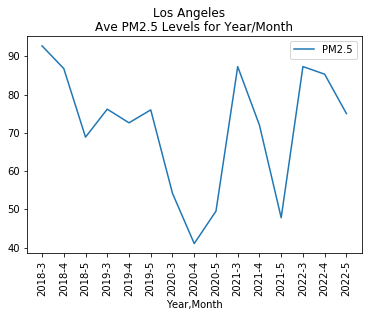

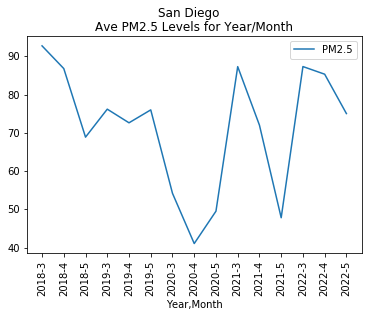

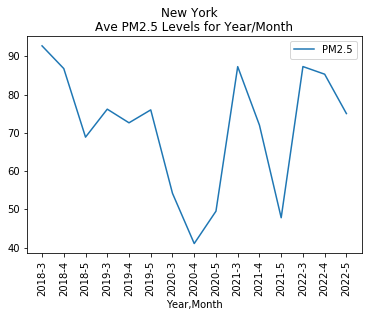

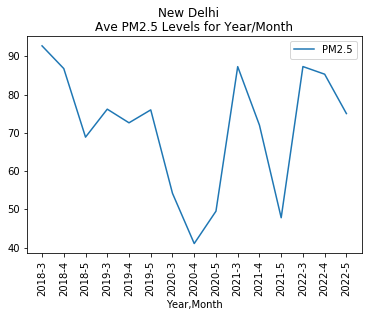

In [6]:
import pandas as pd
import requests as req
from io import StringIO
import matplotlib.pyplot as plt 

#loop through La, Sd, Nyc, Nd data

urls = ["http://berkeleyearth.lbl.gov/air-quality/maps/cities/United_States/California/Los_Angeles.txt", 
        "http://berkeleyearth.lbl.gov/air-quality/maps/cities/United_States/California/San_Diego.txt",
       "http://berkeleyearth.lbl.gov/air-quality/maps/cities/United_States/New_York/New_York.txt",
       "http://berkeleyearth.lbl.gov/air-quality/maps/cities/India/NCT/New_Delhi.txt"]

#function to take in url and display dataframe
def get_url(url):
    page = req.get(url) 
    page_df= pd.read_csv(StringIO(page.text),skiprows=10,sep='\t')
    page_df.columns= ['Year','Month','Day', 'UTC Hour','PM2.5','PM10_mask','Retrospective']     
    page_df = page_df[["Year","Month","PM2.5"]]
    page_df = page_df[(page_df["Year"].isin([2018,2019,2020,2021,2022])) & (page_df["Month"].isin([3,4,5]))]
    page_df = page_df.groupby(["Year","Month"])
    page_df = page_df["PM2.5"].mean()
    df = pd.DataFrame(data=page_df)
    pivot = df.pivot_table(columns="Year",index="Month",values="PM2.5")
    print (get_label(url),"PM2.5 Average")
    print (pivot)
    print (" ")

#function to plot dataframe
def plot_table (table,title, subtitle):
    x = table.plot()
    plt.title(title)
    plt.suptitle(subtitle)
    x.set_xticks(range(len(table)))
    x.set_xticklabels(["%s-%d" % item for item in table.index.tolist()], rotation=90)

#function to get url label
def get_label(urlname):
    return urlname.split('.txt')[0].split('/')[-1].replace('_'," ")
    

#Main
for url in urls: 
    get_url(url)
    plot_table(df, "Ave PM2.5 Levels for Year/Month", get_label(url))



NameError: name 'usr' is not defined